In [1]:
from body_tracking_interface.body_tracking_pb2 import BodyTracking34, Keypoint2D, Keypoint3D, Counter
import json
from mcap_protobuf.writer import Writer

In [2]:
with open("./collected_data/body_tracking_session_20250912_184701_20250912_185532.json", "r") as f:
    data = json.load(f)

In [3]:
data

{'session_info': {'session_name': 'body_tracking_session_20250912_184701',
  'start_time': 1757717221.033392,
  'total_frames': 5050,
  'recorded_frames': 505,
  'body_format': 'BODY_FORMAT.BODY_34',
  'detection_model': 'BODY_TRACKING_MODEL.HUMAN_BODY_FAST'},
 'data': [{'timestamp': 1757717399.5638852,
   'frame_number': 1696,
   'bodies': [{'id': 39,
     'confidence': 50.554405212402344,
     'tracking_state': 'OK',
     'keypoints_2d': [[205.95675659179688, 522.4608154296875],
      [208.32125854492188, 379.1267395019531],
      [204.0753173828125, 235.7241668701172],
      [199.8311309814453, 92.37972259521484],
      [251.7598876953125, 101.44711303710938],
      [360.16015625, 121.99163055419922],
      [397.5472106933594, 342.361328125],
      [418.014892578125, 531.305419921875],
      [422.0835876464844, 568.8651123046875],
      [430.1964111328125, 643.75732421875],
      [369.8044738769531, 611.185791015625],
      [145.45802307128906, 81.30023956298828],
      [14.17282104

In [4]:
frame_number = data['data'][0]["frame_number"]
confidence = data['data'][0]["bodies"][0]["confidence"]
keypoints_2d = data['data'][0]["bodies"][0]['keypoints_2d']
keypoints_3d = data['data'][0]["bodies"][0]['keypoints_3d']

In [5]:
# 0 PELVIS	          9 LEFT_HANDTIP	 18 LEFT_HIP	   27 NOSE
# 1 NAVAL_SPINE	     10 LEFT_THUMB	     19 LEFT_KNEE	   28 LEFT_EYE
# 2 CHEST_SPINE	     11 RIGHT_CLAVICLE   20 LEFT_ANKLE	   29 LEFT_EAR
# 3 NECK	         12 RIGHT_SHOULDER   21 LEFT_FOOT	   30 RIGHT_EYE
# 4 LEFT_CLAVICLE	 13 RIGHT_ELBOW	     22 RIGHT_HIP	   31 RIGHT_EAR
# 5 LEFT_SHOULDER	 14 RIGHT_WRIST	     23 RIGHT_KNEE	   32 LEFT_HEEL
# 6 LEFT_ELBOW	     15 RIGHT_HAND	     24 RIGHT_ANKLE	   33 RIGHT_HEEL
# 7 LEFT_WRIST	     16 RIGHT_HANDTIP	 25 RIGHT_FOOT		
# 8 LEFT_HAND	     17 RIGHT_THUMB	     26 HEAD

tags = [
    "pelvis", "naval_spine", "chest_spine", "neck", 
    "left_clavicle", "left_shoulder", "left_elbow", "left_wrist", 
    "left_hand", "left_handtip", "left_thumb", "right_clavicle", 
    "right_shoulder", "right_elbow", "right_wrist", "right_hand", 
    "right_handtip", "right_thumb", "left_hip", "left_knee", 
    "left_ankle", "left_foot", "right_hip", "right_knee", 
    "right_ankle", "right_foot", "head", "nose", "left_eye", 
    "left_ear", "right_eye", "right_ear", "left_heel", "right_heel"
]

body_tracking_dict = {
    "frame_number": frame_number,
    "confidence": confidence,
}

for tag, kp2d, kp3d in zip(tags, keypoints_2d, keypoints_3d):
    body_tracking_dict[f"{tag}_2d"] = Keypoint2D(x=kp2d[0], y=kp2d[1])
    body_tracking_dict[f"{tag}_3d"] = Keypoint3D(x=kp3d[0], y=kp3d[1], z=kp3d[2])
    
body_tracking_msg = BodyTracking34(**body_tracking_dict)

In [6]:
body_tracking_msg

frame_number: 1696
confidence: 50.5544052
pelvis_2d {
  x: 205.956757
  y: 522.460815
}
naval_spine_2d {
  x: 208.321259
  y: 379.12674
}
chest_spine_2d {
  x: 204.075317
  y: 235.724167
}
neck_2d {
  x: 199.831131
  y: 92.3797226
}
left_clavicle_2d {
  x: 251.759888
  y: 101.447113
}
left_shoulder_2d {
  x: 360.160156
  y: 121.991631
}
left_elbow_2d {
  x: 397.547211
  y: 342.361328
}
left_wrist_2d {
  x: 418.014893
  y: 531.30542
}
left_hand_2d {
  x: 422.083588
  y: 568.865112
}
left_handtip_2d {
  x: 430.196411
  y: 643.757324
}
left_thumb_2d {
  x: 369.804474
  y: 611.185791
}
right_clavicle_2d {
  x: 145.458023
  y: 81.3002396
}
right_shoulder_2d {
  x: 14.172821
  y: 56.418396
}
right_elbow_2d {
  x: 14.2335358
  y: 297.710114
}
right_wrist_2d {
  x: 5.28576183
  y: 531.229187
}
right_hand_2d {
  x: 3.45153618
  y: 579.098938
}
right_handtip_2d {
  x: -0.263068676
  y: 676.043396
}
right_thumb_2d {
  x: 84.2541809
  y: 625.180359
}
left_hip_2d {
  x: 307.556427
  y: 525.717773
}

Start idx: 317, timestamp: 1757717712.9164793
Found 5 peaks


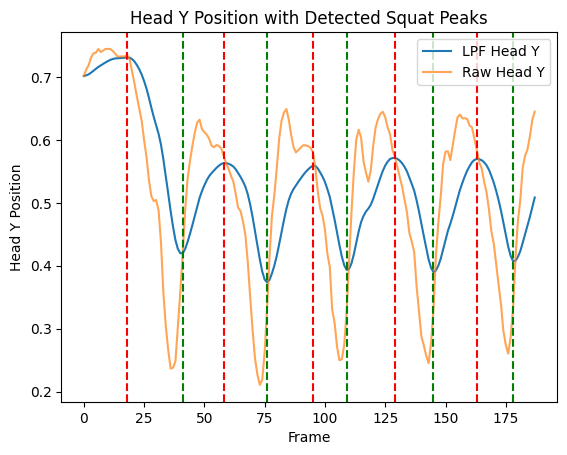

Count: 1 at frame 41
Count: 2 at frame 76
Count: 3 at frame 109
Count: 4 at frame 145
Count: 5 at frame 178


In [22]:
def get_proto_message(data):
    frame_number = data["frame_number"]
    confidence   = data["bodies"][0]["confidence"]
    keypoints_2d = data["bodies"][0]['keypoints_2d']
    keypoints_3d = data["bodies"][0]['keypoints_3d']
    
    tags = [
        "pelvis", "naval_spine", "chest_spine", "neck", 
        "left_clavicle", "left_shoulder", "left_elbow", "left_wrist", 
        "left_hand", "left_handtip", "left_thumb", "right_clavicle", 
        "right_shoulder", "right_elbow", "right_wrist", "right_hand", 
        "right_handtip", "right_thumb", "left_hip", "left_knee", 
        "left_ankle", "left_foot", "right_hip", "right_knee", 
        "right_ankle", "right_foot", "head", "nose", "left_eye", 
        "left_ear", "right_eye", "right_ear", "left_heel", "right_heel"
    ]

    body_tracking_dict = {
        "frame_number": frame_number,
        "confidence": confidence,
    }

    for tag, kp2d, kp3d in zip(tags, keypoints_2d, keypoints_3d):
        body_tracking_dict[f"{tag}_2d"] = Keypoint2D(x=kp2d[0], y=kp2d[1])
        body_tracking_dict[f"{tag}_3d"] = Keypoint3D(x=kp3d[0], y=kp3d[1], z=kp3d[2])
        
    body_tracking_msg = BodyTracking34(**body_tracking_dict)
    
    return body_tracking_msg


def split_squat(head_y_list: list):
    # pass the list to a low pass filter and find the peaks
    lpf_head_y = []
    for i in range(len(head_y_list)):
        if i == 0:
            lpf_head_y.append(head_y_list[i])
        else:
            lpf_head_y.append(0.9 * lpf_head_y[i-1] + 0.1 * head_y_list[i])

    lpf_head_y_copy = lpf_head_y.copy()
    # throw away the first 10 values
    lpf_head_y = lpf_head_y[10:]
    
    # find the peaks
    h_peaks = []
    l_peaks = []
    
    for i in range(1, len(lpf_head_y)-1):
        if lpf_head_y[i] > lpf_head_y[i-1] and lpf_head_y[i] > lpf_head_y[i+1]:
            h_peaks.append(i+10) # add 10 to account for the thrown away values
        if lpf_head_y[i] < lpf_head_y[i-1] and lpf_head_y[i] < lpf_head_y[i+1]:
            l_peaks.append(i+10) # add 10 to account for the thrown away values

    
    print(f"Found {len(h_peaks)} peaks")
    return h_peaks, l_peaks, lpf_head_y_copy

start_idx = -1
ts = data['data'][start_idx]["timestamp"]

while ts - data['data'][start_idx]["timestamp"] < 1:
    ts = data['data'][start_idx]["timestamp"]
    start_idx -= 1
    
start_idx += len(data['data']) + 1 # convert to positive index
    
print(f"Start idx: {start_idx}, timestamp: {ts}")

head_y_list = [i['bodies'][0]['keypoints_3d'][26][1] for i in data['data'][start_idx:]]
peaks, l_peaks, lpf_head_y = split_squat(head_y_list)

import matplotlib.pyplot as plt

plt.plot(lpf_head_y, label='LPF Head Y')
plt.plot(head_y_list, label='Raw Head Y', alpha=0.7)
for peak in peaks:
    plt.axvline(x=peak, color='r', linestyle='--')
for l_peak in l_peaks:
    plt.axvline(x=l_peak, color='g', linestyle='--')
plt.legend()
plt.xlabel("Frame")
plt.ylabel("Head Y Position")
plt.title("Head Y Position with Detected Squat Peaks")
plt.show()

with open("./collected_data/test.mcap", "wb") as f, Writer(f) as mcap_writer:
    for i in data['data'][start_idx:]:
        body_tracking_msg = get_proto_message(i)
        mcap_writer.write_message(
            topic="/body_tracking", 
            message=body_tracking_msg, 
            publish_time=int(i["timestamp"] * 1e9),
            log_time=int(i["timestamp"] * 1e9)
        )
        
    state = 0 # 0: idle, 1: down
    count = 0
    
    h = 0
    l = 0

    for i in range(start_idx, len(data['data'])):
        if l < len(l_peaks) and i - start_idx == l_peaks[l]:
            if state == 1: # was down
                state = 0 # now idle
                count += 1
                print(f"Count: {count} at frame {i - start_idx}")
            l += 1
            
        if h < len(peaks) and i - start_idx == peaks[h]:
            if state == 0: # was idle
                state = 1 # now down
            h += 1
            
        counter_msg = Counter(count=count, state=state)
        mcap_writer.write_message(
            topic="/squat_counter", 
            message=counter_msg, 
            publish_time=int(data['data'][i]["timestamp"] * 1e9),
            log_time=int(data['data'][i]["timestamp"] * 1e9)
        )
        